# Aprendizaje Supervizado - Regresión

En la sección se cubre lo siguiente:

* Ejemplo
* Algo de Teoría
* Consideraciones 
* Otro ejemplo
* Ejercicios


Como previamente se [mencionó](01_Aprendizaje_Automático.ipynb), cuando en la relación $$ Y=h(X)+\epsilon$$ la $Y$ es una variable que puede ser modelada como *continua* o como $Y \in \mathbb{R}$ se tienen un problema de **regresión**. La variable $X$ en esta relación representa la matriz de dato y $h()$ representa al algoritmo o modelo que se use para estimar $Y$.

Es quizás el modelo más claro entre 2 variables, ya que en general cuando tenemos solo dos variables la regresión se puede ver como:$$ Y=aX+b$$

Esa ecuación es prácticamente una de las primeras que se aprenden a interpretar como *"la recta que se ajusta a los datos"*. Antes de pasar analizar los datos, podemos generar datos aleatorios y estimar la regresión, la cual ya se realizó [aquí.](02_Breve_Revision_de_Sklearn.ipynb)

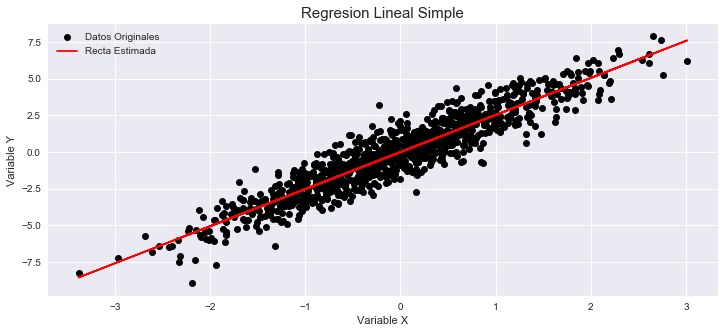

In [13]:
#Codigo de la regresión lineal


%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


#configuraciones de tipo de gráficos y de tamaño
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize']=15

#Se generan los datos 
x=np.random.normal(size=1000)
y=np.random.normal(size=1000)+2.5*x

#Se define el modelo
Modelo=LinearRegression()
Modelo.fit(x.reshape((-1,1)),y)

#Se realiza una predicción
Pred=Modelo.predict(x.reshape((-1,1)))

#Se grafican los datos
plt.plot(x,y,'ko')
plt.plot(x,Pred,'r-')
plt.legend(['Datos Originales','Recta Estimada'])
plt.title("Regresion Lineal Simple")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")

La anterior gráfica y estimación de la regresión lineal es lo que le da sentido a la frase *"la recta que pasa por lo puntos"*.

## Ejemplo

### Nota:

Para el ejemplo se usan los datos sobre [la estimación de energía de aparatos en un hogar](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction#), para mayores detalles al respecto se puede leer el artículo:

*[Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix,Data driven prediction models of energy use of appliances in a low-energy house](http://www.sciencedirect.com/science/article/pii/S0378778816308970) 

In [1]:
#Entono para exploració y tratamiento de los datos
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#configuracion Matplotlib
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize']=15

Los datos se encuentran ubicados dentro del folder *DataSets*, tambiém se pueden descargar directamente del [repositorio.](https://archive.ics.uci.edu/ml/datasets.html)

In [2]:
Datos=pd.read_csv("DataSets/energydata_complete.csv")

Se hace una pequeña revisión de los datos. Se visualizan los primeros 5 registros, se revisa el tamaño de la muestra y la cantidad de variables, el tipo  variables y vemos el histograma de la variable $Y$.

In [3]:
#Visualización de los primeros registros
Datos.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


Se observa que se cuenta con una variable de tiempo *date*, esta variable no será considerada de momento para la exploración.

In [4]:
#El tamaño de la muestra
Datos.shape

(19735, 29)

In [5]:
#El tipo de variables
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [6]:
#Estadísticas de la variable dependiente
Datos.Appliances.describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

Estimamos su histograma para visualizar la distribución de la variable que se toma como la variabe dependiente. 

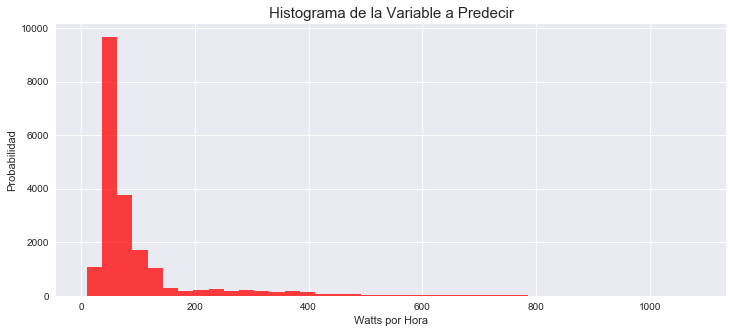

In [12]:
n, bins, patches = plt.hist(Datos.Appliances.values, 40, facecolor='r', alpha=0.75)
plt.xlabel('Watts por Hora')
plt.ylabel('Probabilidad')
plt.title('Histograma de la Variable a Predecir')
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Observamos que la muestra de datos tiene 19,735 registros. Se cuenta con 29 columnas, de las cuales solo consideramos 27 como variables predictivas, la razón es que descartamos la primera columna (variable **date**) que es el tiempo de la medición para este ejercicio. 

Observamos en las estadísticas generales de la variable repuesta de nombre **Appliances**, tiene un comportamiento "peculiar", ya que cuenta con muchos valores menores a 100 pero aún así cuenta con algunos valores entre 100 y 1080. 

El histograma muestra que su distribución aproximadamente se visualiza como una distribución de tipo [**cola pesada**](https://en.wikipedia.org/wiki/Heavy-tailed_distribution). Esto implica que se necesita cierto pre-procesamiento para mejorar la calidad de los modelos, para el ejemplo se omite de momento.

Creamos nuestra muestra de datos para entrenar y probar la regresión lineal.

In [18]:
#Creación de datos para el modelo de clasificación

Datos_input=Datos.iloc[:,2:29].copy()
Y_output=Datos.iloc[:,1:2].copy()

Elegimos las variables que necesitamos.

In [19]:
#Se divide la muestra entre el conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

#Definimos tomar 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(Datos_input, Y_output,
                                                    test_size=0.20,
                                                    random_state=123,)

Revisamos el histográma de la variable *y_train* y *y_test*, para ver que la elección no afecte la distribución de la variable dependiente. Para generar estas gráficas ahora usamos la función `distplot()` de la biblioteca seaborn.

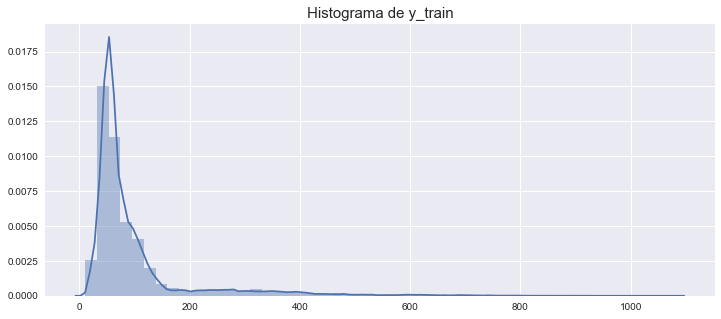

In [21]:
sns.distplot(y_train)
plt.title("Histograma de y_train")

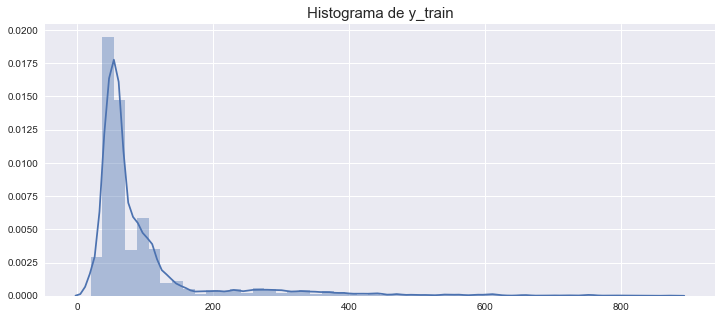

In [22]:
sns.distplot(y_test)
plt.title("Histograma de y_test")

Si bien, no es exactamente la misma forma pero conserva la forma en general y se muestra también la presencia de valores muy grandes y muchos de valor menor a 200.

Estimamos la regresión lineal sobre nuestros datos.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Modelo_LR=LinearRegression()
Modelo_LR.fit(X_train,y_train)
Pred_LR=Modelo_LR.predict(X_test)

print("Regresión Lineal")
print("El error cuadrado medio del modelo fue %f"%(mean_squared_error(y_test,Pred_LR)))

Regresión Lineal
La precisión del modelo fue 8692.250903


Para los modelos lineales suele ser una guía el ver el valor que se obtiene en el estadístico $R^2$, para el modelo de regresión lineal en scikit-learn se obtienen directamente con el método `score`.

In [25]:
#El valor de la R^2

Modelo_LR.score(X_test,y_test)

0.16442158850330502

### Observaciones:

El ejemplo anterios podríamos concluir que obtenemos un mal resultado en el modelo, es común usar como guía el valor de $R^2$ para considerar si el modelo es bueno o malo. Este estadístico tienen como valor máximo $1$, pero eso no significa que contar con un valor cercano a $1$ implica que es un modelo *perfecto*. En otra sección se explican detalles al respecto.

Las observaciones claves es observar que e valor de $MSE$ y $R^2$ indican que el modelo es malo, en buena medida se explica por el comportamiento de la variable **Appliances**, pero la finalidad es mostar la estimación y evaluación del modelo lineal.

## Algo de teoría

Pensando en la regresión simple $$ Y=aX+b$$ tenemos que lo que se busca es estimar los valores de los coeficientes $a$ y $b$. Con la estimación de estos valores se trata de poder obtener $\hat{Y}=aX+b$ tales que seán muy cercanos a $Y$.

Un modo de estimar los coeficientes $a$ y $b$ que son desconocidos, es definir:$$ J(a,b)=\frac{1}{2} \sum{}((aX+b)-y)^2$$ y buscar los coeficientes que minimizan esta ecuación. 

Éste método para estimar los parámetros es conocido como minimos cuadrados ordinarios, la ecuación $J(a,b)$ es una *función de costo* para la regresión lineal.

### ¿Cuál es la relación de la estimación con los errores?

Un error entre el valor de $\hat{Y}$ y $Y$, se puede denotar como $e=Y-\hat{Y}=Y-(aX+b)$, considerando el cuadrado se tienen la ecuación: $$E(a,b)= \sum{}e^2=J(a,b)$$

### Resumen

La estimación de la regresión lineal al final es buscar la recta que minimize cierta función, donde aquello que se minimiza son los *errores* en este ejemplo.

Este tema visto desde el punto de vista de probabilidad, implica que cuando estimamos la regresión esperamos que los residuos o *errores* tengan una distribución Normal con media $0$ y desviación estandar $1$. 

**Nota:** Estos breves comentarios solo tratan aclarar un poco lo que sucede al estimar el algoritmo, en otra sección de explican  más detalles al respecto.


## Consideraciones

La regresión lineal es uno de los algoritmos báse, pero también se requiere varias etapas de **pre-procesamiento** para buscar obtener los mejores resultados. Así que varias de las consideraciones al aplicar una regresión lineal tiene que ver con:

* La relación entre la variable respuesta y alguna variable muestran alguna relación **no lineal**.
* El impacto de los valores atípicos u **outliers**.
* La relación entre las variables del mismo modelo, este fenómeno se llama **colinealidad**
* Todas las variables $X_n$ aportan al modelo o solo un subconjunto de las variables.

Hay más fenómenos y detalles a revisar, pero con estos 4 uno se puede dar cuenta que a grosso modo son fenómenos entre las variables y fenómenos de las variables independientes con respecto a la variable dependiente.

## Otro Ejemplo

Hacemos una estimación del mismo problema pero usando ahora el algoritmo Random Forest (bosques aleatoríos), la ventaja de este algoritmo es que no requiere que se cambie la escala de las variables y dependiendo de ciertos parámetros los efectos que se presentan entre las variables independientes pueden no afectar su estimación. 

In [31]:
#Se cargan los Random Forest
from sklearn.ensemble import RandomForestRegressor

#Se define el modelo
Modelo_RF=RandomForestRegressor()
Modelo_RF.fit(X_train,y_train.values.ravel())
Pred_RF=Modelo_RF.predict(X_test)

print("Random Forest")
print("El error cuadrado medio del modelo fue %f"%(mean_squared_error(y_test,Pred_RF)))

/home/dlegorreta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Árboles Aleatorios
El error cuadrado medio del modelo fue 5588.022802


In [29]:
#El valor de la R^2

Modelo_RF.score(X_test,y_test)

0.47487232366349968

Lo único que se realizó fue estimar la regresión mediante otro algoritmos, RandomForest. Se observa con respecto a las estimaciones pasadas que este último es mucho mejor. Tan solo la $R^2$ pasó de 16.44% a un 47.48%, lo cual es una gran mejoría de un modelo a otro.

### Ejercicios

Para el ejercicio se hace uso los datos `load_boston`.

In [11]:
# 1.- Carga los datos desde sklearn y asignar el nombre Data


In [7]:
# 2.- Revisar la descripción de los datos
Data=load_boston()

In [19]:
# 3.- Ejecuta el siguiente código 
DF_Boston=pd.DataFrame(Data.data,columns=Data.feature_names)
Target=pd.DataFrame(Data.target,columns=['MEDV'])

print("Se tiene una muestra de %s registros"% DF_Boston.shape[0])
print("Se tienen un total de %s variables independientes"%DF_Boston.shape[1])
print("La variable dependiente es:")
print(Target.columns.tolist())


Se tiene una muestra de 506 registros
Se tienen un total de 13 variables independientes
La variable dependiente es:
['MEDV']


Para poder realizar la regresión lineal de una sola variable debe de considerar un detalle sobre los arreglos de numpy. El siguiente código muestra como estimarla.

In [63]:
#Ejemplo de como estimar la regresión lineal simple

from sklearn.linear_model import LinearRegression

Mod_1=LinearRegression()
Mod_1.fit(DF_Boston['LSTAT'].values.reshape(-1, 1),Target)

#Visualización de la ecuación
print("La ecuación estimada es %f + %fX"%(Mod_1.intercept_.tolist()[0],Mod_1.coef_.tolist()[0][0]))

La ecuación estimada es 34.553841 + -0.950049X


In [ ]:
# Estimar la regresión lineal simple de la variable AGE contra Target
#Imitar el código anterior

In [ ]:
# 4.- Estimar la regresión lineal multiple; es decir, con todas las variables en DF_Boston vs Target separando trin/test de 80/20.
#     ¿cuál es su error cuadrado medio?

In [ ]:
# 5.- Estimar la regresión lineal multiple con solo las varible ['ZN','NOX','RM','B','LSTAT'] y compara la calidad de modelo del ejercico 4
#     Nota: para elegir las variables, hay varias formas. La más sencilla en este caso es usar DF_Boston[['ZN','NOX','RM','B','LSTAT']]


In [ ]:
# 6.- Replicar los ejercicio 4 y 5 pero aplica RandomForest para realizar la regresión.